In [69]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import statistics as stat

In [70]:
# X, y = datasets.load_breast_cancer(return_X_y=True)

X_path = r'D:\NEU Notes\EECE5644 - Intro to ML\Python\HW2\X_snts.csv'
y_path = r'D:\NEU Notes\EECE5644 - Intro to ML\Python\HW2\y_snts.csv'

X = np.loadtxt(X_path, delimiter=',')
y = np.loadtxt(y_path, delimiter=',')
print("Dataset has n=%d samples, each with d=%d features," % X.shape,"as well as %d labels." % y.shape[0])
print(X)

Dataset has n=3117 samples, each with d=4164 features, as well as 3117 labels.
[[1. 1. 1. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [3. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [2. 0. 0. ... 0. 0. 1.]]


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # Train:Test =  80:20
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)   # Train:Test =  1:99

print("Randomly split dataset to %d training and %d test samples" % (X_train.shape[0],X_test.shape[0]))

Randomly split dataset to 2493 training and 624 test samples


In [72]:
alpha_val = np.linspace(2**-15, 2**5, 1000)
acc = []

for a in alpha_val:
    classifier = MultinomialNB(alpha=a)
    classifier.fit(X_train, y_train)
    y_pred =  classifier.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))   #ACC = (TP + TN) / (P+N)

# print("Training classifier...",end="")
# print(" done")

In [73]:
max_acc_index = np.argmax(acc)
max_acc = acc[max_acc_index]
optimal_alpha = alpha_val[max_acc_index]
print("Max Accuracy:",max_acc)
print("Optimal Alpha:",optimal_alpha)

Max Accuracy: 0.8397435897435898
Optimal Alpha: 3.0517578125e-05


In [74]:
# Average Accuracy for Various Seed values with Optimal Alpha
random_state = np.linspace(0,100,10)
acc_vals = []

for state_val in random_state:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=int(state_val))   # Train:Test =  80:20
    classifier = MultinomialNB(alpha=optimal_alpha)
    classifier.fit(X_train, y_train)
    y_pred =  classifier.predict(X_test)
    acc_vals.append(accuracy_score(y_test,y_pred))
    

In [75]:
mean_accuracy = stat.mean(acc_vals)
sd_accuracy = stat.stdev(acc_vals)

print("Mean Accuracy:",mean_accuracy)
print("Standard Deviation:",sd_accuracy)

Mean Accuracy: 0.8395833333333333
Standard Deviation: 0.016815472294326513


In [76]:
# Plot of Average Accuracy and Alpha

alpha_val2 = np.linspace(2**-15, 2**5, 100)
meanAccVals = []
stdevVals = []
acc_vals.clear()


for a in alpha_val2:
    for state_val in random_state:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=int(state_val))   # Train:Test =  80:20
        classifier = MultinomialNB(alpha=a)
        classifier.fit(X_train, y_train)
        y_pred =  classifier.predict(X_test)
        acc_vals.append(accuracy_score(y_test,y_pred))
    
    meanAccVals.append(stat.mean(acc_vals))
    stdevVals.append(stat.stdev(acc_vals))
    acc_vals.clear()



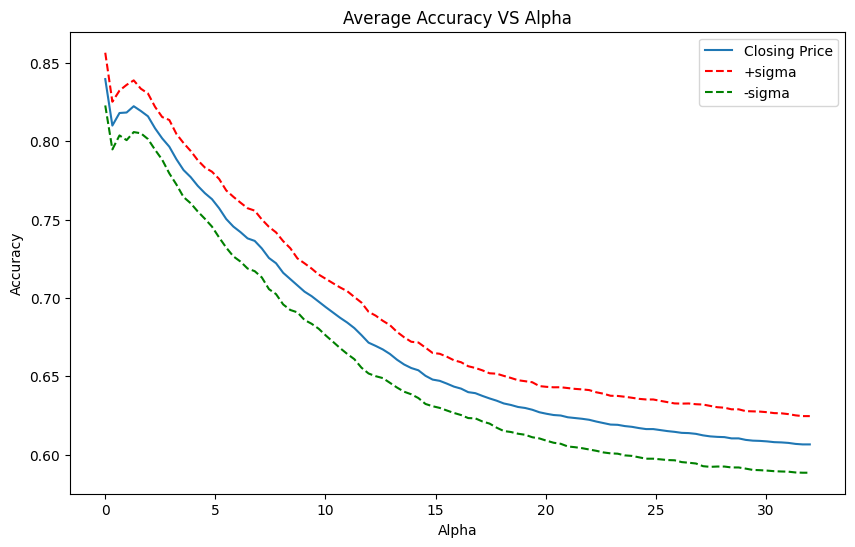

In [77]:
posStdev = [elem1 + elem2 for elem1, elem2 in zip(meanAccVals, stdevVals)]
negStdev = [elem1 - elem2 for elem1, elem2 in zip(meanAccVals, stdevVals)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alpha_val2, meanAccVals, label='Closing Price')
plt.plot(alpha_val2, posStdev, label='+sigma', linestyle='--', color='red')
plt.plot(alpha_val2, negStdev, label='-sigma', linestyle='--', color='green')
# plt.fill_between(dates[window_size - 1:], upper_band, lower_band, color='lightgray', alpha=0.4, label='Bollinger Bands')
plt.title('Average Accuracy VS Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
max_index = np.argmax(meanAccVals)
max_avg_acc = meanAccVals[max_index]
net_optimal_alpha = alpha_val2[max_index]
print("Max Average Accuracy:",max_avg_acc)
print("Optimal Alpha:",net_optimal_alpha)

Max Average Accuracy: 0.8395833333333333
Optimal Alpha: 3.0517578125e-05


In [79]:
# feature_log
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # Train:Test =  80:20
classifier = MultinomialNB(alpha=net_optimal_alpha)
classifier.fit(X_train, y_train)
y_pred =  classifier.predict(X_test)

In [80]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = r'D:\NEU Notes\EECE5644 - Intro to ML\Python\word_mapping.csv'
df = pd.read_csv(file_path, header=None)

# Convert the DataFrame into a dictionary with column 0 as keys and column 1 as values
word_dict = pd.Series(df.iloc[:, 1].values, index=df.iloc[:, 0]).to_dict()

labels = {0:'MISC', 1:'AIMX', 2: 'OWNX', 3:'CONT', 4:'BASE'}
posterior = classifier.feature_log_prob_
# print(posterior)
postIndex = np.argsort(posterior, axis=1)[:, ::-1][:, :5]

print(postIndex)

[[  0  94  81 170  39]
 [  0  94  10  81   9]
 [  0  94  39  81   9]
 [ 94   0  81  39 170]
 [  0  94  39 170   9]]


In [81]:
#word_dict[0]
new_array = [[str(j) for j in i] for i in postIndex]
for i in range(len(postIndex)):
    new_array[i] = [word_dict[j] for j in postIndex[i]]
j = 0
for i in new_array:
    
    # print(j," : ")
    print(labels[j], end=" : ")
    print(i)
    print()
    j+=1


MISC : ['the', 'of', 'to', 'citation', 'and']

AIMX : ['the', 'of', 'a', 'to', 'in']

OWNX : ['the', 'of', 'and', 'to', 'in']

CONT : ['of', 'the', 'to', 'and', 'citation']

BASE : ['the', 'of', 'and', 'citation', 'in']

